In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D,Conv1D, MaxPooling1D



file_path = '/content/drive/MyDrive/Capstone/dataset_fitur 2.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Fungsi pra-pemrosesan teks
def preprocess_text(text):
    if text is not None:
        return text.lower()
    return text

df['Kategori'] = df['Kategori'].apply(preprocess_text)
df['Jenis Hukum'] = df['Jenis Hukum'].apply(preprocess_text)


label_encoder = LabelEncoder()
df['Jenis Hukum'] = label_encoder.fit_transform(df['Jenis Hukum'])

# Membagi dataset menjadi data latih dan data uji
X = df['Kategori']
y = df['Jenis Hukum']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenisasi teks
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Mengonversi teks menjadi sequence dan padding
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=50, padding='post')

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=50, padding='post')


# Membangun model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(5000, 16, input_length=50),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(5),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model baru
history = model.fit(X_train_padded, y_train, epochs=30, validation_data=(X_test_padded, y_test), verbose=2)

# Menampilkan ringkasan model
model.summary()

# Evaluasi model CNN pada pelatihan
train_loss, train_accuracy = model.evaluate(X_train_padded, y_train, verbose=2)

# Evaluasi model CNN pada data validasi
validation_loss, validation_accuracy = model.evaluate(X_test_padded, y_test, verbose=2)

print(f"Akurasi Pelatihan (CNN): {train_accuracy * 100:.2f}%")
print(f"Akurasi Validasi (CNN): {validation_accuracy * 100:.2f}%")

Epoch 1/30
11/11 - 1s - loss: 0.6895 - accuracy: 0.5690 - val_loss: 0.6945 - val_accuracy: 0.5000 - 821ms/epoch - 75ms/step
Epoch 2/30
11/11 - 0s - loss: 0.6810 - accuracy: 0.5862 - val_loss: 0.7007 - val_accuracy: 0.5000 - 77ms/epoch - 7ms/step
Epoch 3/30
11/11 - 0s - loss: 0.6800 - accuracy: 0.5862 - val_loss: 0.7116 - val_accuracy: 0.5000 - 82ms/epoch - 7ms/step
Epoch 4/30
11/11 - 0s - loss: 0.6771 - accuracy: 0.5862 - val_loss: 0.7070 - val_accuracy: 0.5000 - 94ms/epoch - 9ms/step
Epoch 5/30
11/11 - 0s - loss: 0.6755 - accuracy: 0.5862 - val_loss: 0.7046 - val_accuracy: 0.5000 - 97ms/epoch - 9ms/step
Epoch 6/30
11/11 - 0s - loss: 0.6733 - accuracy: 0.5862 - val_loss: 0.6996 - val_accuracy: 0.5000 - 90ms/epoch - 8ms/step
Epoch 7/30
11/11 - 0s - loss: 0.6699 - accuracy: 0.5862 - val_loss: 0.6980 - val_accuracy: 0.5000 - 72ms/epoch - 7ms/step
Epoch 8/30
11/11 - 0s - loss: 0.6633 - accuracy: 0.5862 - val_loss: 0.6890 - val_accuracy: 0.5000 - 77ms/epoch - 7ms/step
Epoch 9/30
11/11 - 0s 

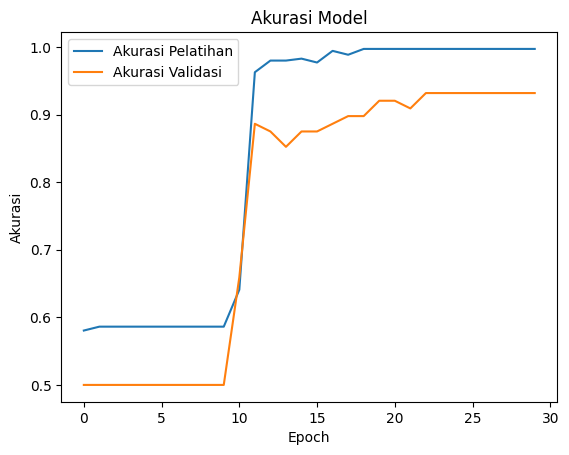

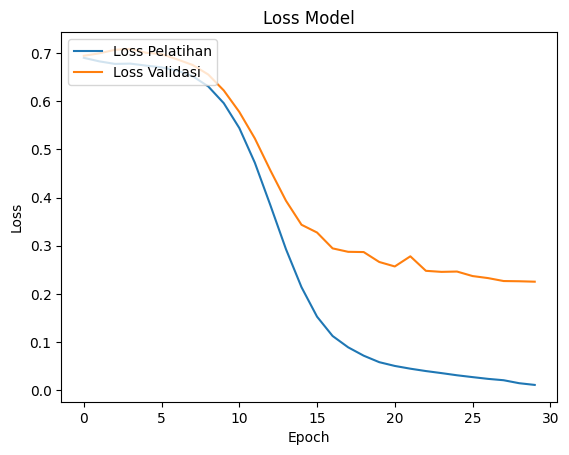

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Plot loss pelatihan dan validasi
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
def preprocess_input_user(text):
    # Mengubah teks menjadi huruf kecil dan mengaplikasikan tokenisasi dan padding
    text = text.lower()
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=50, padding='post')
    return padded

def predict_jenis_hukum(text, model):
    processed_input = preprocess_input_user(text)
    prediction = model.predict(processed_input)
    return 'Hukum Pidana' if prediction[0][0] > 0.3 else 'Hukum Perdata'

# Contoh penggunaan
input_text = input("Masukkan deskripsi masalah hukum: ")
predicted_category = predict_jenis_hukum(input_text, model)
print(f"Masalah tersebut termasuk dalam kategori: {predicted_category}")

Masukkan deskripsi masalah hukum: jika saya memiliki kasus tentang sengketa tanah dengan pihak pemerintah, ternasuk jenis hukum apa?
1/1 [==============================] - 0s 15ms/step
Masalah tersebut termasuk dalam kategori: Hukum Perdata
